# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies

%matplotlib inline
from pathlib import Path  ### required to import data from csv file to build our initial DataFrames
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick ### added to use 'PercentFormatter()'setting it to "1" - in 'Analyze the Performance' section
import matplotlib.pyplot as plt ### added for an alternate coding option for the bar plots

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 

#we use the 'read_csv' function to import data into memory

portfolio_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the first 5 rows of the DataFrame

portfolio_df.head

<bound method NDFrame.head of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-01                  31.950240          14.991826   
2014-10-02                  31.936110          14.994072   
2014-10-03                  31.969707          14.999596   
2014-10-06                  32.048215          14.999471   
2014-10-07                  31.964216          14.994720   
...                               ...                ...   
2020-09-04                  31.546221          14.364969   
2020-09-08                  31.491425          14.337851   
2020-09-09                  31.526541          14.368297   
2020-09-10                  31.486896          14.388256   
2020-09-11                  31.473747          14.360482   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  S&P 500  
date                                                                      
2014-10-01                    59.977830

#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns

# we first create a new df to hold data for manipulations needed to calculate profitability...
# 'returns_daily_df' is visibly defined as pulling it's data from 'portfolio_df'
 
returns_daily_df = portfolio_df.pct_change()

# Drop any rows with all missing values

# I prefer shortening its name to shorten code now that data source visible and manipulation begins
# 'PNL' is short acronym for 'profit and loss' and now the name of df

PNL = returns_daily_df.dropna().copy()


# Review the first five rows of the daily returns DataFrame.
PNL.head

<bound method NDFrame.head of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-02                  -0.000442           0.000150   
2014-10-03                   0.001052           0.000368   
2014-10-06                   0.002456          -0.000008   
2014-10-07                  -0.002621          -0.000317   
2014-10-08                   0.000390           0.000369   
...                               ...                ...   
2020-09-04                  -0.001079           0.005050   
2020-09-08                  -0.001737          -0.001888   
2020-09-09                   0.001115           0.002123   
2020-09-10                  -0.001258           0.001389   
2020-09-11                  -0.000418          -0.001930   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2014-10-02                     0.0000

---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

### since the S&P 500 covered up most funds' data in the plot without intervention...
I researched and figured out ways to use a different color palatte, line style, and readable legend to match colors to graph.  This led to adding in some new methods and functions not originally required for this challenge module.  Direct URL links to code sources appear in the `README.md` file.  You will also see notes coded throughout the notebook as well.

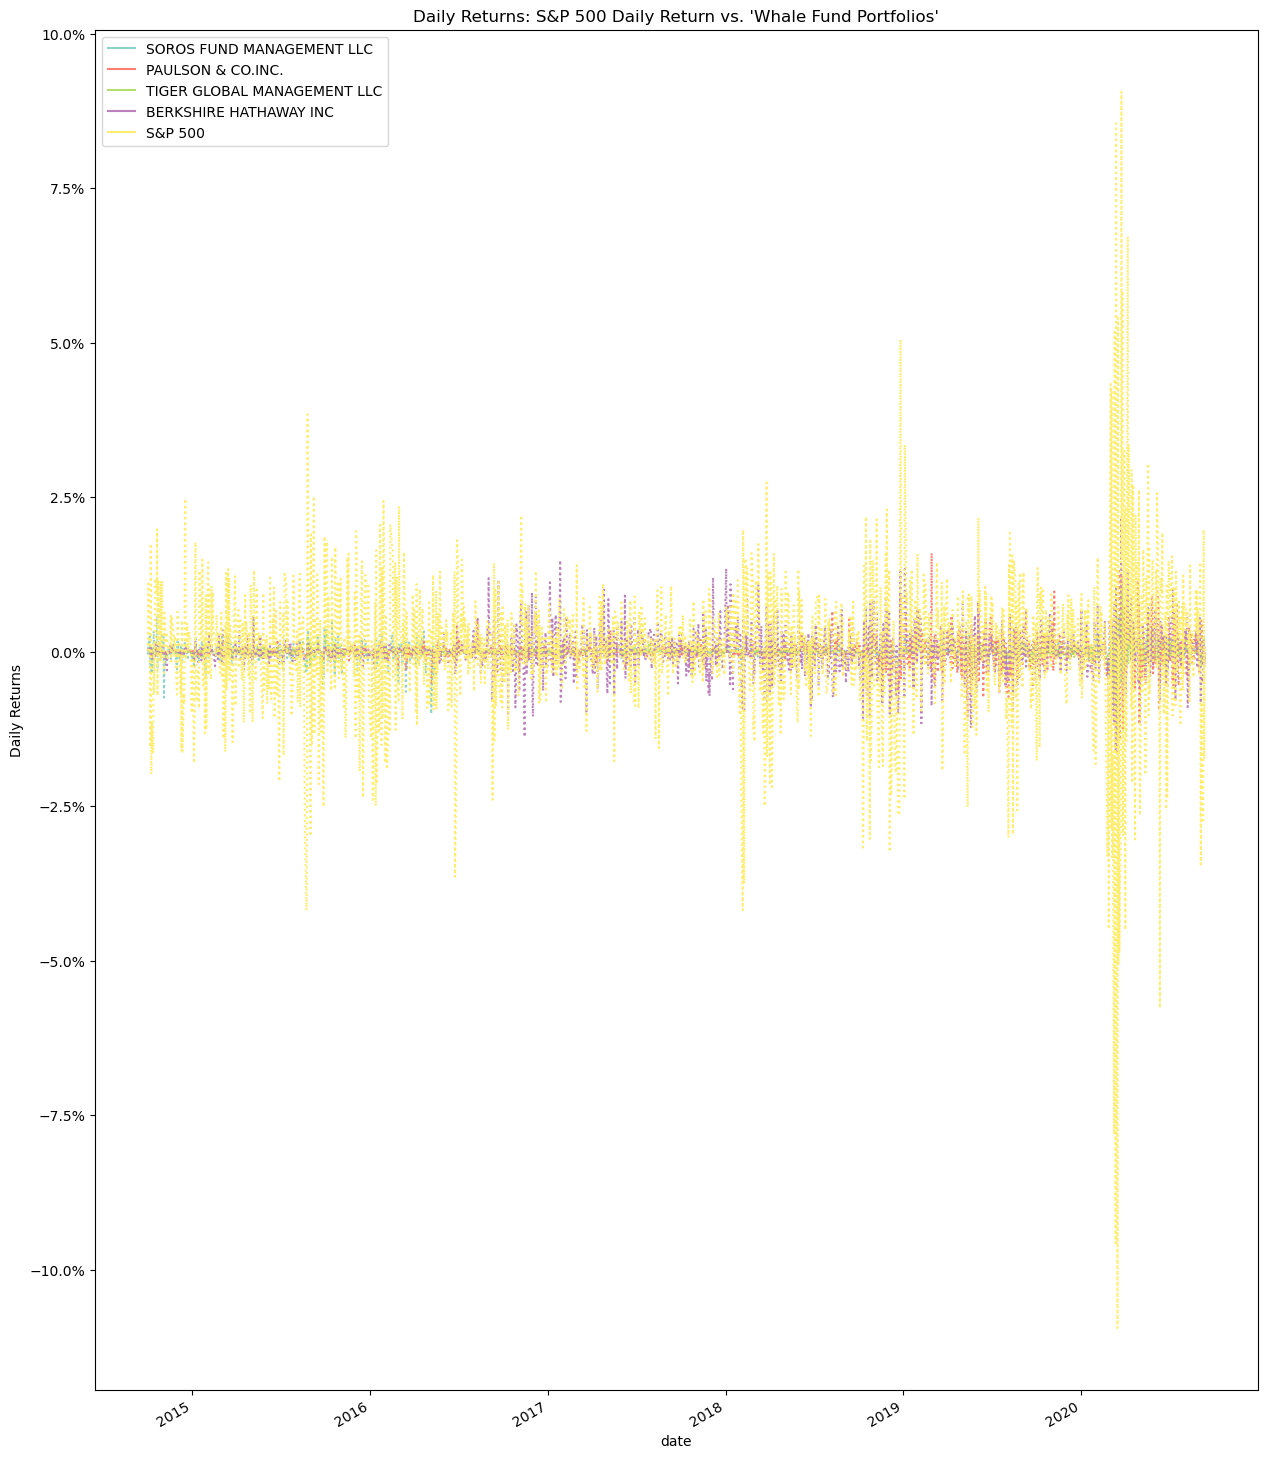

In [5]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size

ax = PNL.plot(figsize=(15,20),
              ylabel="Daily Returns",
              title="Daily Returns: S&P 500 Daily Return vs. 'Whale Fund Portfolios'",
              colormap='Set3',
              linestyle=':') # linestyle ':' is same as 'dotted'

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# selected and kept colormap ** 'Set3' ** after testing many others Set3 seemed to allow most visual support for data
# selected linestyle 'dotted' to allow more color to show in the visual, default settings allows S&P 500 to cover up other funds
# import matplotlib.ticker as mtick  <--- code note from import - see links to source later in notebook

# code above also used dotted lines in the 'key' which was not ideal due to visibility, so added code below.

legend = ax.legend()
for line in legend.get_lines():
    line.set_linestyle('-') # linestyle '-' is same as 'solid'

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [6]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Since we are compiling P&L of unrealized gains/losses I have named our working df to'AARR' (Accrual Accounting Rate of Return)
# in 'AARR' we accumulate the product of the daily % change from the 'portfolio_df' with the 'cumprod()' function
# to convert the cumulative returns into an accrued percentage over time, we then must subtract [1] from the value to create a meaningful 'y-axis'

AARR = cumulative_PNL = (1 + PNL).cumprod()-1

# Review the last 5 rows of the cumulative returns DataFrame

AARR.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

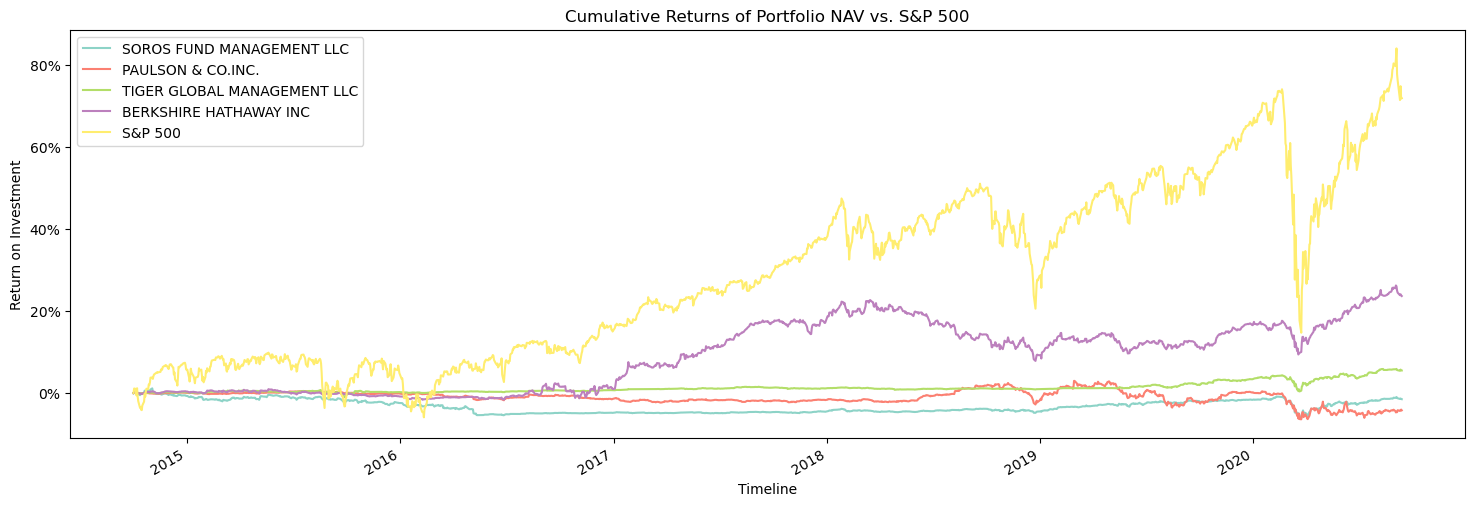

In [7]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size.

ax=AARR.plot(
    figsize=(18, 6),
    legend=True,
    xlabel="Timeline",
    ylabel="Return on Investment",
    title="Cumulative Returns of Portfolio NAV vs. S&P 500",
    colormap='Set3'
)
    
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No - not from a cumulative perspective over the course of this dataset.  However, we can see on the timeline of the ROI in this comparison that the 'S&P 500' created negative returns that cratered below the returns of all 4 portfolios and underperformed during ~ Q3 of 2014, ~ Q3of 2015, and ~ Q1 of 2016.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

ax = PNL.plot(
    figsize=(18, 6),
    kind='box',
    ylabel="Volatility",
    title="Volatility Analysis:  Funds vs. S&P 500 Index"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame

whales = PNL.drop(columns=["S&P 500"]).copy()
whales.head()

# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

ax = whales.plot(
    figsize=(18, 6),
    kind='box',
    ylabel="Daily Returns",
    title="Volatility Analysis: The 4 Whale Funds"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer:**  

'BERKSHIRE HATHAWAY INC' is **most volatile**

   'TIGER GLOBAL MANAGEMENT LLC' is **least volatile**  

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [ ]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest

STD = PNL.std().sort_values()
STD

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [ ]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest

ASTD = (STD * np.sqrt(252)).sort_values()
ASTD

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

roll_21_std = PNL.rolling(window=21).std() # using data from original copy of the 'PNL' df to include S&P 500 

ax = roll_21_std.plot(
    figsize=(10,7),
    title="Daily Returns 21-day Rolling Window: Whale Fund Values and S&P 500",
    ylabel="Daily Return Variance",
    colormap='Set3')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
whales_21 = whales.rolling(window=21).std()

In [ ]:
# check if data needs further cleaning

whales_21.tail

In [ ]:
# Drop any rows with all missing values

SD21funds = whales_21.dropna().copy()
SD21funds.tail

In [ ]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size

ax = SD21funds.plot(
    figsize=(10,7),
    title="'Whales' 21 Day Rolling Standard Deviations",
    ylabel="Standard Deviation")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None if assuming that higher volatility measures higher risk.  While Berkshire Hathaway carries the highest annualized standard deviation value of the funds (SD = 0.051692), the **S&P 500 poses a higher risk** with a 3x+ higher standard deviation **(S&P_500 SD =0.183345)**.  

In [ ]:
ASTD # the annualized standard deviation for each of the four portfolios and for the S&P 500

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** No.  prior to 2018 there appears to be little or no relationship in the direction of risk measured by the 21-day rolling standard deviations.  After  does clearly time a spike in all 4 funds and the S&P 500 seem to track same direction for periods of time, there are clear segments in the timeline where the funds' directions do not match points in time when the S&P 500 increases or move in same direction as the other funds. So while risk may increase in tandem with S&P 500 for periods of time, there are clearly contradictions to that occurence based on the visualizations over different slices of the timeline.

see below visualizations that prove each portfolio does not follow the direction of the S&P 500 at all times.

visualization:

+ **2A** - Fall 2015 to Spring of 2017 - increases in S&P 500 not mirrored by BRK, general direction is often inverted
+ **2B** - 2018 through 2019 - increases in S&P 500 not mirrored by SOROS or TIGER in 2018, then by end of 2019, all start to spike at same times
+ **2C** - 2020 forward - the risk increases in S&P 500 track closely to all 4 funds - global pandemic puts all investments in riskier waters


In [ ]:
Q2_a = roll_21_std.loc[
    '2015-07-31':'2017-05-31'
]

ax = Q2_a.plot(
    figsize=(10, 7),
    title="Question 2, Visualization A: S&P Risk vs. Whales (Fall 2015 to Spring of 2017)",
    ylabel="21-day Rolling Standard Deviation",
    colormap='Set3'
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [ ]:
Q2_b = roll_21_std.loc[
    '2018':'2019'
]

ax = Q2_b.plot(
    figsize=(10, 7),
    title="Question 2, Visualization B: S&P Risk vs. Whales (2018 through 2019)",
    ylabel="21-day Rolling Standard Deviation",
    colormap='Set3'
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [ ]:
Q2_c = roll_21_std.loc[
    '2020':
]

ax = Q2_c.plot(
    figsize=(10, 7), 
    title="Question 2, Visualization C: S&P Risk vs. Whales (2020 and beyond)",
    ylabel="21-day Rolling Standard Deviation", 
    colormap='Set3'
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** No single fund is clearly more risky over the span of entire data set, however, risk indicated by rolling standard deviation method, does show clear windows where 1 or more funds would qualify as riskiest of the group:

+ **3A** - SOROS poses most risk from the beginning of the data in 2014 until middle of 2016
+ **3B** - BRK poses most risk over 2nd half of 2016 through February of 2019
+ **3C** - PAULSON & CO risk begins to eclipse BRK at various times and seems just about as risky as BRK by the end of the data set in later 2020


In [ ]:
Q3_a = SD21funds.loc[
    '2014':'2016-07-31'
]

ax = Q3_a.plot(
    figsize=(10,7),
    title="Question 3A: SOROS FUND MANAGEMENT LLC - RISK LEADER (Late 2014 to mid 2016)",
    ylabel="Standard Deviation")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [ ]:
Q3_b = SD21funds.loc[
    '2016-05-31':'2019-02-28'
]

ax = Q3_b.plot(
    figsize=(10,7),
    title="Question 3B: BERKSHIRE HATHAWAY INC. - RISK LEADER (Mid 2016 to Early 2019)",
    ylabel="Standard Deviation"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [ ]:
Q3_c = SD21funds.loc[
    '2019':
]

ax = Q3_c.plot(
    figsize=(10,7), 
    title="Question 3C: BERKSHIRE HATHAWAY Battles SOROS for the Lead (Early 2019 to Later 2020)",
    ylabel="Standard Deviation"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [ ]:
# after saving DataFrames from earlier exercises, we have now used matplotlib's '.loc' and '.plot' together to zoom in on the visual

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [ ]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest

annual_avg_return = PNL.mean() * 252
sorted_avg_return = annual_avg_return.sort_values()
sorted_avg_return

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [ ]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest

sharpe_ratios = annual_avg_return / ASTD
sorted_sharpe_ratios = sharpe_ratios.sort_values()
sorted_sharpe_ratios

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size

plt.figure(
    figsize=(18, 6)
)
plt.bar(
    sorted_sharpe_ratios.index,
    sorted_sharpe_ratios
)
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for Portfolios')
plt.xticks(rotation=45)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** the **best risk-return profile is BERKSHIRE HATHAWAY INC** has with highest Sharpe Ratio score of 0.717512 while the **worst is PAULSON & CO.INC.** comes in last with a negative Sharpe Ratio of -0.189998 AND Standard Deviation higher than the other 2 funds at 2.199%


---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [ ]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

SP500_var = PNL['S&P 500'].rolling(window=60).var()
SP500_var.tail()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

BRK_cov = PNL['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(PNL['S&P 500'])
BRK_cov.tail()

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

BRK_beta = BRK_cov / SP500_var
BRK_beta.tail()

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta
BRK_avg_b = BRK_beta.mean()
BRK_avg_b



##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

plt.figure(figsize=(18, 6))
BRK_beta.plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('BERKSHIRE HATHAWAY INC - 60-day Rolling Beta')


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
TGM_cov = PNL['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(PNL['S&P 500'])
TGM_cov.tail()


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
TGM_beta = TGM_cov / SP500_var
TGM_beta.tail()

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta
TGM_avg_b = TGM_beta.mean()
TGM_avg_b

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

plt.figure(figsize=(18, 6))
BRK_beta.plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('TIGER GLOBAL MANAGEMENT LLC - 60-day Rolling Beta')

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** BERKSHIRE HATHAWAY INC seems more sensitive to movements in the 'S&P 500' and carries 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---